In [1]:
import pandas as pd

# Cargar el dataset
ruta = r"C:\Users\46210843\OneDrive - Universidad Nacional Abierta y a Distancia\6TO SEMESTRE\ANÁLISIS DE DATOS\trabajo 3\Vehicle Dataset\Car details v3.csv"

# Leer el archivo CSV
df = pd.read_csv(ruta, encoding="latin1")

# Mostrar las primeras filas
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [2]:
# Información general del dataset
df.info()

# Resumen estadístico
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [3]:
# Mostrar valores nulos en cada columna
df.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
# Convertir 'mileage' eliminando ' kmpl' y convirtiendo a float
df["mileage"] = df["mileage"].str.replace(" kmpl", "", regex=True)
df["mileage"] = df["mileage"].str.replace(" km/kg", "", regex=True)  # Para autos eléctricos
df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")  # Convertir a número

# Convertir 'engine' eliminando ' CC' y convirtiendo a float
df["engine"] = df["engine"].str.replace(" CC", "", regex=True)
df["engine"] = pd.to_numeric(df["engine"], errors="coerce")

# Convertir 'max_power' eliminando ' bhp' y convirtiendo a float
df["max_power"] = df["max_power"].str.replace(" bhp", "", regex=True)
df["max_power"] = pd.to_numeric(df["max_power"], errors="coerce")

# Verificar que los datos sean numéricos
df[["mileage", "engine", "max_power"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    7907 non-null   float64
 1   engine     7907 non-null   float64
 2   max_power  7912 non-null   float64
dtypes: float64(3)
memory usage: 190.6 KB


In [5]:


# Reemplazar valores nulos con la mediana sin usar inplace=True
df["mileage"] = df["mileage"].fillna(df["mileage"].median())
df["engine"] = df["engine"].fillna(df["engine"].median())
df["max_power"] = df["max_power"].fillna(df["max_power"].median())
df["seats"] = df["seats"].fillna(df["seats"].median())

# Eliminar la columna 'torque'
df = df.drop(columns=["torque"])

# Verificar si quedan valores nulos
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [6]:
# Mostrar valores únicos en columnas categóricas
categorical_columns = ["fuel", "seller_type", "transmission", "owner"]
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


fuel: ['Diesel' 'Petrol' 'LPG' 'CNG']
seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
transmission: ['Manual' 'Automatic']
owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [7]:
df = pd.get_dummies(df, columns=["fuel", "seller_type", "transmission"], drop_first=True)


In [8]:
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 0
}
df["owner"] = df["owner"].map(owner_mapping)


In [9]:
print(df.head())  # Muestra las primeras filas
print(df.info())  # Verifica que las columnas categóricas fueron transformadas


                           name  year  selling_price  km_driven  owner  \
0        Maruti Swift Dzire VDI  2014         450000     145500      1   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000      2   
2      Honda City 2017-2020 EXi  2006         158000     140000      3   
3     Hyundai i20 Sportz Diesel  2010         225000     127000      1   
4        Maruti Swift VXI BSIII  2007         130000     120000      1   

   mileage  engine  max_power  seats  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0    23.40  1248.0      74.00    5.0         True     False        False   
1    21.14  1498.0     103.52    5.0         True     False        False   
2    17.70  1497.0      78.00    5.0        False     False         True   
3    23.00  1396.0      90.00    5.0         True     False        False   
4    16.10  1298.0      88.20    5.0        False     False         True   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  
0                  

In [10]:
df.drop(columns=["name"], inplace=True)


In [11]:
X = df.drop(columns=["selling_price"])  # Todas las columnas excepto el precio
y = df["selling_price"]  # Variable objetivo (precio del automóvil)


In [12]:
from sklearn.model_selection import train_test_split

# 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver tamaños
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6502, 13), (1626, 13), (6502,), (1626,))

In [13]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
modelo_rl = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_rl.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = modelo_rl.predict(X_test)

# Mostrar las primeras 5 predicciones vs valores reales
import pandas as pd
resultados = pd.DataFrame({"Real": y_test.values, "Predicho": y_pred})
print(resultados.head())


     Real       Predicho
0  198000  181839.576133
1  500000  896076.001735
2  425000  477065.686872
3  150000  295388.633233
4  525000  357497.926910


In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Calcular MAE (Error Absoluto Medio)
mae = mean_absolute_error(y_test, y_pred)

# Calcular RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mostrar resultados
print(f"R² (Coeficiente de determinación): {r2:.4f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")


R² (Coeficiente de determinación): 0.6885
MAE (Error Absoluto Medio): 270094.61
RMSE (Raíz del Error Cuadrático Medio): 451861.49


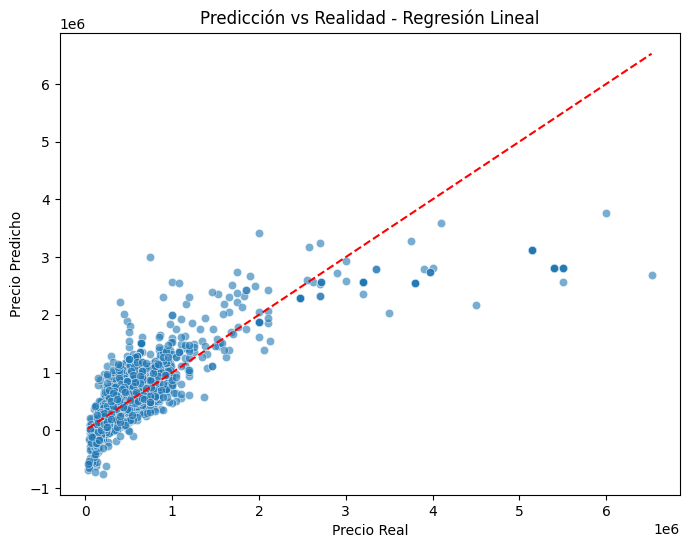

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Predicción vs Realidad - Regresión Lineal")
plt.show()


In [17]:
### Interpretación del Modelo de Regresión Lineal

###El modelo de regresión lineal fue entrenado utilizando el conjunto de datos `Car details v3.csv`, y logró un R² de 0.6885, lo cual indica que puede explicar aproximadamente el 69% de la variabilidad en los precios de los automóviles.

###Las métricas obtenidas muestran:
###- MAE (Error Absoluto Medio): 270,094.61
###- RMSE (Raíz del Error Cuadrático Medio): 451,861.49

###Esto implica que el modelo comete errores significativos en algunos casos, especialmente con autos de precio elevado.

###La gráfica de dispersión entre valores reales y predichos muestra una tendencia lineal clara, pero también revela que el modelo tiende a subestimar o sobreestimar precios en extremos altos.

###Se sugiere probar modelos como Árboles de Decisión o Random Forest para mejorar la capacidad predictiva, ya que estos pueden manejar relaciones no lineales de manera más efectiva.
